<a href="https://colab.research.google.com/github/youngpaper1115/Cable_TV_churnout/blob/main/modeling_t_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings    # 경고문구 지우기

In [ ]:
# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score    # validation  검증 라이브러리
from sklearn.linear_model import LogisticRegression    # 로지스틱 회귀 라이브러리
from sklearn.linear_model import Lasso    # 라쏘 라이브러리
from sklearn.linear_model import Ridge    # 릿지 라이브러리
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from xgboost import XGBClassifier    # XGBoost 라이브러리
from sklearn.ensemble import RandomForestClassifier    # 랜덤포레스트 라이브러리
import warnings    # 경고문구 지우기

In [ ]:
## 한글폰트 적용

## 데이터 불러오기

In [ ]:
path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
fe = fm.FontEntry(fname='/home/ljy1115/project/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
import os

path = os.getcwd()
print(path)

/home/ljy1115/project


In [ ]:
## 데이터 불러오기

In [ ]:
df = pd.read_csv('/home/ljy1115/project/dataset.csv',sep=',')

In [ ]:
df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.00000,1,0,7.25000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.00000,1,0,71.28330,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.00000,0,0,7.92500,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.00000,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.00000,0,0,8.05000,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.00000,0,0,13.00000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.00000,0,0,30.00000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.45000,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.00000,0,0,30.00000,C,First,man,True,C,Cherbourg,yes,True


## null 값 확인

In [ ]:
df.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## unnamed 칼럼 삭제

In [ ]:
df=df.drop('Unnamed: 0', axis=1)

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.25000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00000,1,0,71.28330,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.92500,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.05000,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,13.00000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.00000,0,0,30.00000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45000,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.00000,0,0,30.00000,C,First,man,True,C,Cherbourg,yes,True


## cat / num 구분

In [ ]:
# 숫자변수 확인
num = df.select_dtypes(include='number')
# 범주변수 확인
cat = df.select_dtypes(exclude='number')

In [ ]:
num

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.00000,1,0,7.25000
1,1,1,38.00000,1,0,71.28330
2,1,3,26.00000,0,0,7.92500
3,1,1,35.00000,1,0,53.10000
4,0,3,35.00000,0,0,8.05000
...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.00000
887,1,1,19.00000,0,0,30.00000
888,0,3,NaN,1,2,23.45000
889,1,1,26.00000,0,0,30.00000


In [ ]:
cat

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df1 = df[df['survived']==1]
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.00000,1,0,71.28330,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.92500,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.00000,0,2,11.13330,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.00000,1,0,30.07080,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
df0 = df[df['survived']==0]
df0.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.25000,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.00000,0,0,8.05000,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.45830,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.00000,0,0,51.86250,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.00000,3,1,21.07500,S,Third,child,False,NaN,Southampton,no,False


## 박스플랏

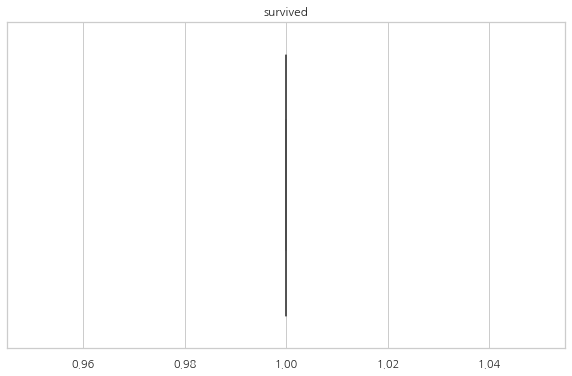

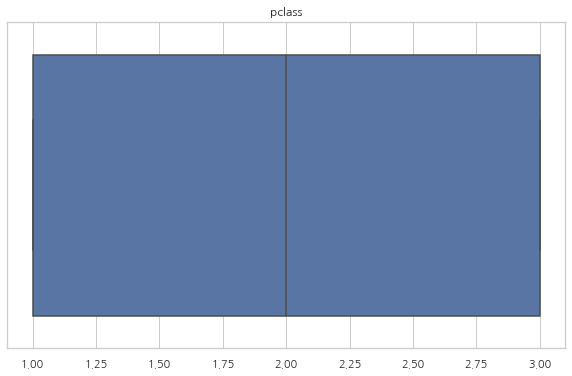

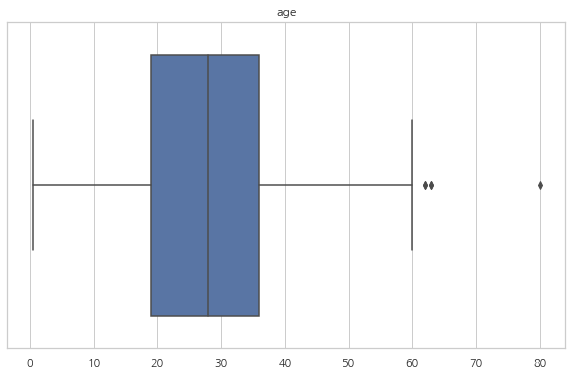

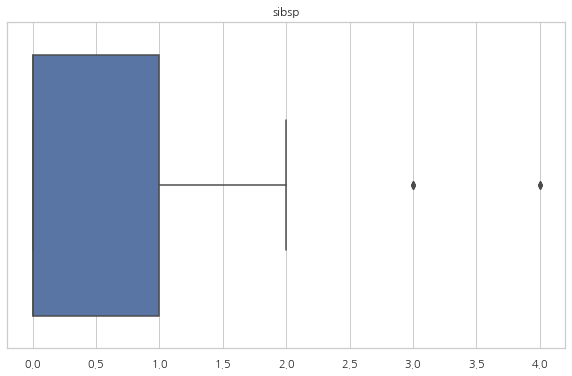

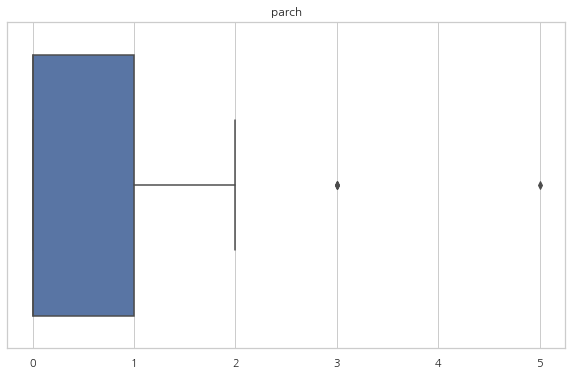

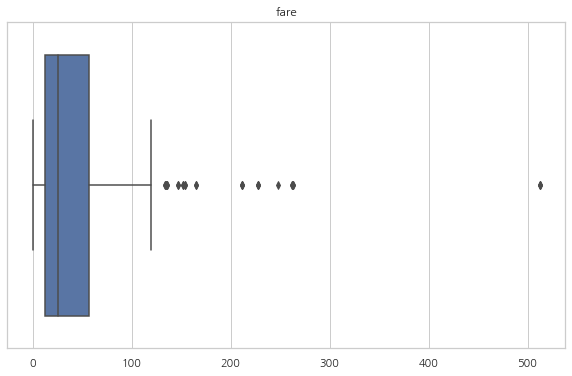

In [ ]:
# survived가 1인 데이터의 박스플랏
for i in num.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df1, x=df1[i])
    plt.title(i)
    plt.xlabel('')
    plt.show

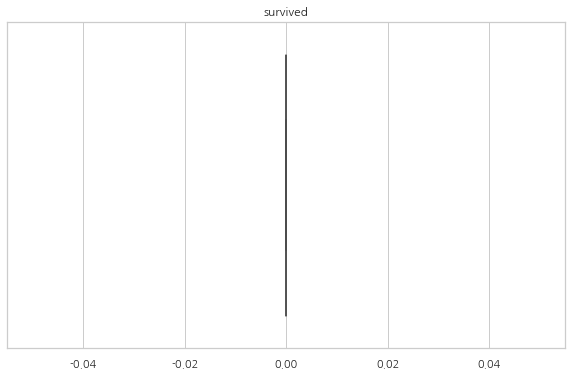

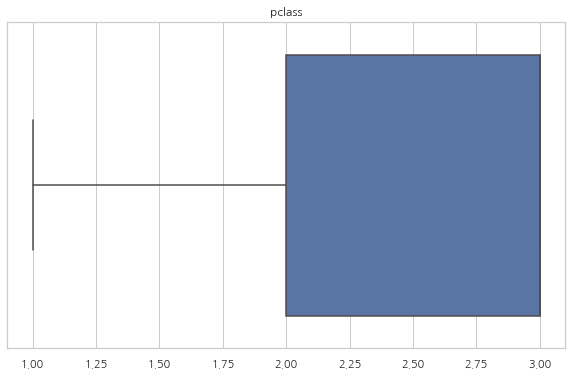

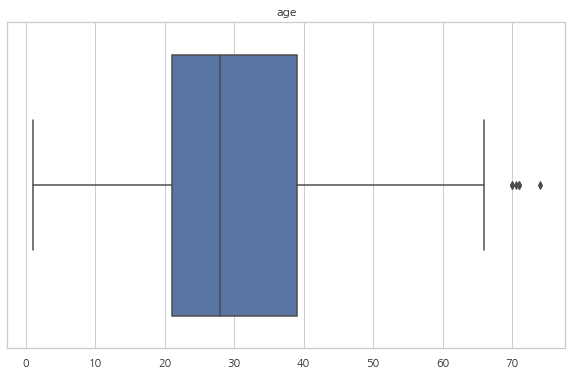

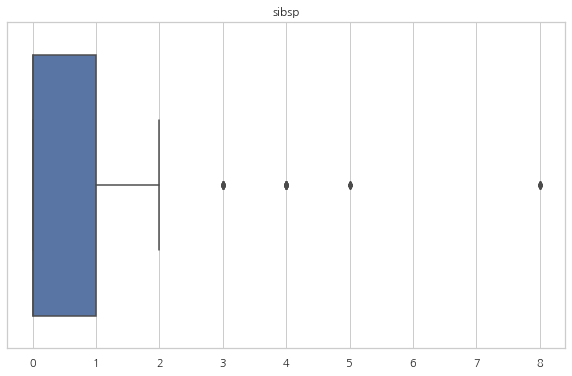

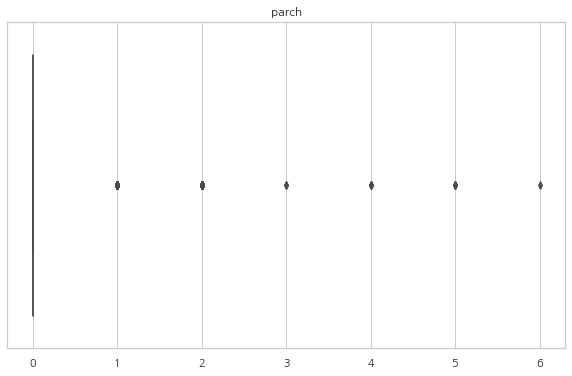

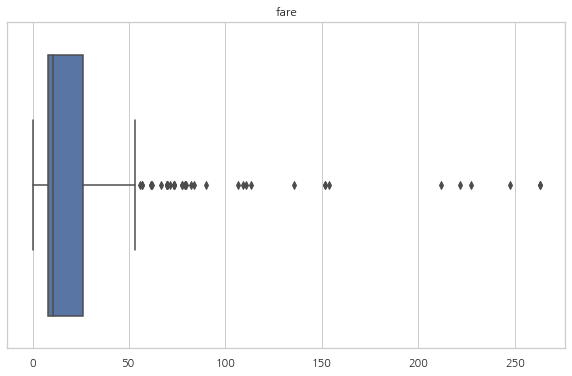

In [ ]:
# survived가 0인 데이터의 박스플랏
for i in num.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df0, x=df0[i])
    plt.title(i)
    plt.xlabel('')
    plt.show

## 종속변수 파이플랏

0    549
1    342
Name: survived, dtype: int64


<AxesSubplot:ylabel='Type'>

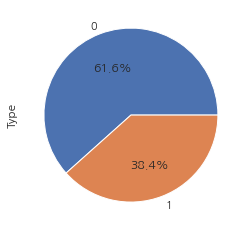

In [ ]:
print(df['survived'].value_counts())
df.groupby('survived').size().plot(kind='pie', y = 'survived', label = "Type", autopct='%1.1f%%')

In [ ]:
df['age']=df['age'].fillna(df['age'].mean())

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df=df.drop("embark_town", axis=1)

In [ ]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck          688
alive           0
alone           0
dtype: int64

In [ ]:
df['deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [ ]:
df['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
df['deck'] = df['deck'].replace({np.nan: 'C'})

In [ ]:
df['deck'].value_counts()

C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  deck        891 non-null    object 
 12  alive       891 non-null    object 
 13  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


In [ ]:
df.shape

(891, 14)

In [ ]:
# 숫자변수 확인
num = df.select_dtypes(include='number')
# 범주변수 확인
cat = df.select_dtypes(exclude='number')

In [ ]:
# drop_first = True
categorical = cat.columns
df = pd.get_dummies(df, columns = categorical, prefix = categorical, drop_first = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   survived         891 non-null    int64  
 1   pclass           891 non-null    int64  
 2   age              891 non-null    float64
 3   sibsp            891 non-null    int64  
 4   parch            891 non-null    int64  
 5   fare             891 non-null    float64
 6   sex_male         891 non-null    uint8  
 7   embarked_Q       891 non-null    uint8  
 8   embarked_S       891 non-null    uint8  
 9   class_Second     891 non-null    uint8  
 10  class_Third      891 non-null    uint8  
 11  who_man          891 non-null    uint8  
 12  who_woman        891 non-null    uint8  
 13  adult_male_True  891 non-null    uint8  
 14  deck_B           891 non-null    uint8  
 15  deck_C           891 non-null    uint8  
 16  deck_D           891 non-null    uint8  
 17  deck_E          

In [ ]:
df = df.drop('alive_yes', axis=1)

## train / test split

In [ ]:
# train / test split
feature_columns = list(df.columns.difference(['survived']))
X = df[feature_columns]    # 변인변수들의 데이터 Set
y = df['survived']    # 종속변수 데이터를

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 55)    # Test Set을 0.2의 비율로 생성

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(712, 20) (179, 20) (712,) (179,)


In [ ]:
## 종속변수 컬럼 지워야 함
col_list = X.columns.to_list()
col_list

['adult_male_True',
 'age',
 'alone_True',
 'class_Second',
 'class_Third',
 'deck_B',
 'deck_C',
 'deck_D',
 'deck_E',
 'deck_F',
 'deck_G',
 'embarked_Q',
 'embarked_S',
 'fare',
 'parch',
 'pclass',
 'sex_male',
 'sibsp',
 'who_man',
 'who_woman']

## 스케일링(minmax)

In [ ]:
minmax_list = df.columns.tolist()
minmax_list.remove('survived')
minmax_list

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'sex_male',
 'embarked_Q',
 'embarked_S',
 'class_Second',
 'class_Third',
 'who_man',
 'who_woman',
 'adult_male_True',
 'deck_B',
 'deck_C',
 'deck_D',
 'deck_E',
 'deck_F',
 'deck_G',
 'alone_True']

In [ ]:
# 스케일링 적용 변수별 데이터 추출

# train_X1 = train_X[standard_list]
# test_X1 = test_X[standard_list]
train_X2 = train_X[minmax_list]
test_X2 = test_X[minmax_list]

In [ ]:
# 데이터 스케일링 진행

# scaler1 = StandardScaler()
# train_X1 = scaler1.fit_transform(train_X1)
# test_X1 = scaler1.transform(test_X1)

scaler2 = MinMaxScaler()
train_X2 = scaler2.fit_transform(train_X2)
test_X2 = scaler2.fit_transform(test_X2)

In [ ]:
# 스케일링 값으로 대체

# train_X[standard_list] = train_X1
# test_X[standard_list] = test_X1
train_X[minmax_list] = train_X2
test_X[minmax_list] = test_X2

## 샘플링(오버,언더)

In [ ]:
# 오버샘플링 진행
oversample = RandomOverSampler(sampling_strategy='minority') # sampling_strategy=0.4 -> 소수집단데이터수/다수집단데이터수 = 0.4
train_X_os, train_y_os = oversample.fit_resample(train_X, train_y)

In [ ]:
# 언더샘플링 진행
train_X_us, train_y_us = RandomUnderSampler(random_state = 55).fit_resample(train_X, train_y)

## 로지스틱 모델링 및 스코어링

In [ ]:
# 모델
from sklearn.linear_model import LogisticRegression
lr_clf1 = LogisticRegression()
lr_clf1.fit(train_X_os, train_y_os)
coef = lr_clf1.coef_.reshape(-1)
lr_pred = lr_clf1.predict(test_X)
lr_pred_proba = lr_clf1.predict_proba(test_X)[:,1]

In [ ]:
from sklearn.metrics import *
print(classification_report(test_y, lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
y_test2 = test_y.reset_index(drop = True)
cross = pd.concat([y_test2, pd.DataFrame(lr_pred)],axis =1)
cross.columns = ['true','pred']

In [ ]:
cross['cm'] = np.where((cross['true']== 1) & (cross['pred']==1), 'TP', np.where((cross['true']== 1) & (cross['pred']==0),'FN', np.where((cross['true']== 0) & (cross['pred']==1), 'FP',np.where((cross['true']== 0) & (cross['pred']==0), 'TN',0))))
conf_mat = dict(cross['cm'].value_counts())

In [ ]:
conf_mat

{'TN': 97, 'TP': 52, 'FN': 17, 'FP': 13}

In [ ]:
accuracy = ( conf_mat['TN'] + conf_mat['TP'] ) / ( conf_mat['TN']+conf_mat['TP'] + conf_mat['FN']+conf_mat['FP'] )
precision = conf_mat['TP'] / (conf_mat['TP'] + conf_mat['FP'])
recall = conf_mat['TP'] / (conf_mat['TP'] + conf_mat['FN'])
f1_score = 2*recall*precision / (recall+precision)

print('accuracy : ', accuracy)
print('precision : ', precision)
print('recall : ', recall)
print('f1_score : ', f1_score)

accuracy :  0.8324022346368715
precision :  0.8
recall :  0.7536231884057971
f1_score :  0.7761194029850746


/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


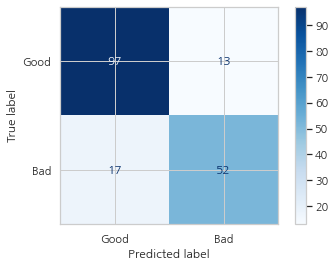

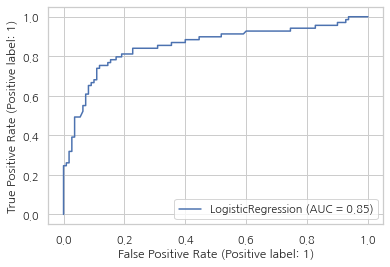

In [ ]:
# confusion matrix, AUC-ROC 커브 생성
# AUC 0.8이상이면 good

disp = plot_confusion_matrix(lr_clf1, test_X, test_y, cmap='Blues', values_format='d', display_labels=['Good', 'Bad'])
disp = plot_roc_curve(lr_clf1, test_X, test_y)

## 변수 중요도

In [ ]:
#feature_weights
df_features = pd.DataFrame(columns=['col','weight'])
for idx, w in sorted(enumerate(coef), key=lambda x:-x[1])[:100]:
    df_features = df_features.append(pd.DataFrame([[train_X.columns[idx],w]],columns=['col','weight']),ignore_index=True)
df_features=df_features.sort_values(by=['weight'],ascending=False).reset_index(drop=True)
df_features['log_value'] = np.exp(df_features.weight)

<AxesSubplot:xlabel='weight', ylabel='col'>

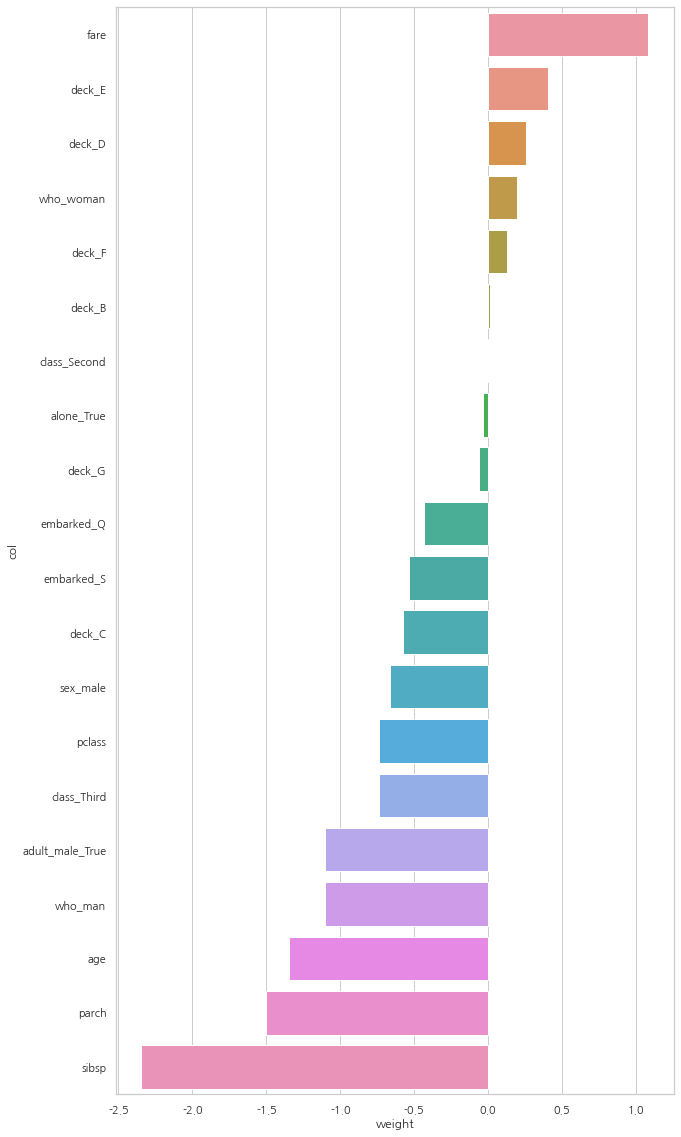

In [ ]:
#plot
plt.figure(figsize=(10,20))
sns.barplot(data=df_features,x='weight',y='col')
# plt.show()

In [ ]:
# 모델 정확도 확인 함수 정의

def print_score(true, pred, train = True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict = True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
# 로지스틱 진행
# 로지스틱 회귀분석 모델 생성
lr_clf = LogisticRegression() 

# 모델 학습 진행(오버샘플링 데이터)
lr_clf.fit(train_X_os, train_y_os)

LogisticRegression()

In [ ]:
# 모델 정확도 확인
train_y_pred = lr_clf.predict(train_X_os)
test_y_pred = lr_clf.predict(test_X)

print_score(train_y_os, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

Train Result:
Accuracy Score: 80.07%
_______________________________________________
CLASSIFICATION REPORT:
                  0         1  accuracy  macro avg  weighted avg
precision   0.79075   0.81132   0.80068    0.80103       0.80103
recall      0.81777   0.78360   0.80068    0.80068       0.80068
f1-score    0.80403   0.79722   0.80068    0.80063       0.80063
support   439.00000 439.00000   0.80068  878.00000     878.00000
_______________________________________________
Confusion Matrix: 
 [[359  80]
 [ 95 344]]

Test Result:
Accuracy Score: 79.33%
_______________________________________________
CLASSIFICATION REPORT:
                  0        1  accuracy  macro avg  weighted avg
precision   0.82883  0.73529   0.79330    0.78206       0.79277
recall      0.83636  0.72464   0.79330    0.78050       0.79330
f1-score    0.83258  0.72993   0.79330    0.78125       0.79301
support   110.00000 69.00000   0.79330  179.00000     179.00000
_______________________________________________


# 연습문제2

In [ ]:
import os
print(os.getcwd())

/home/ljy1115/project


In [ ]:
# qsec 컬럼 min-max로 변환 > 0.5
import pandas as pd

df = pd.read_csv("/home/ljy1115/project/mtcars.csv", sep=',')

In [ ]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
df.shape

(32, 12)

In [ ]:
df['qsec'].head()

0    16.46
1    17.02
2    18.61
3    19.44
4    17.02
Name: qsec, dtype: float64

In [ ]:
scaler_qsec = MinMaxScaler()
df[['qsec_minmax']] = scaler_qsec.fit_transform(df[['qsec']])

In [ ]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,qsec_minmax
0,Mazda RX4,21.00000,6,160.00000,110,3.90000,2.62000,16.46000,0,1,4,4,0.23333
1,Mazda RX4 Wag,21.00000,6,160.00000,110,3.90000,2.87500,17.02000,0,1,4,4,0.30000
2,Datsun 710,22.80000,4,108.00000,93,3.85000,2.32000,18.61000,1,1,4,1,0.48929
3,Hornet 4 Drive,21.40000,6,258.00000,110,3.08000,3.21500,19.44000,1,0,3,1,0.58810
4,Hornet Sportabout,18.70000,8,360.00000,175,3.15000,3.44000,17.02000,0,0,3,2,0.30000


In [ ]:
# qsec을 minmax 스케일링한 값이 0.5가 넘는 row
df[df['qsec_minmax'] > 0.5].shape

(9, 13)

# 보스턴 데이터 연습

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()

/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000


In [ ]:
df_top10 = df.sort_values(by='CRIM', ascending=False)

In [ ]:
df_top10 = df_top10.iloc[0:10,:]
df_top10

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,88.97620,0.00000,18.10000,0.00000,0.67100,6.96800,91.90000,1.41650,24.00000,666.00000,20.20000,396.90000,17.21000
418,73.53410,0.00000,18.10000,0.00000,0.67900,5.95700,100.00000,1.80260,24.00000,666.00000,20.20000,16.45000,20.62000
405,67.92080,0.00000,18.10000,0.00000,0.69300,5.68300,100.00000,1.42540,24.00000,666.00000,20.20000,384.97000,22.98000
410,51.13580,0.00000,18.10000,0.00000,0.59700,5.75700,100.00000,1.41300,24.00000,666.00000,20.20000,2.60000,10.11000
414,45.74610,0.00000,18.10000,0.00000,0.69300,4.51900,100.00000,1.65820,24.00000,666.00000,20.20000,88.27000,36.98000
404,41.52920,0.00000,18.10000,0.00000,0.69300,5.53100,85.40000,1.60740,24.00000,666.00000,20.20000,329.46000,27.38000
398,38.35180,0.00000,18.10000,0.00000,0.69300,5.45300,100.00000,1.48960,24.00000,666.00000,20.20000,396.90000,30.59000
427,37.66190,0.00000,18.10000,0.00000,0.67900,6.20200,78.70000,1.86290,24.00000,666.00000,20.20000,18.82000,14.52000
413,28.65580,0.00000,18.10000,0.00000,0.59700,5.15500,100.00000,1.58940,24.00000,666.00000,20.20000,210.97000,20.08000
417,25.94060,0.00000,18.10000,0.00000,0.67900,5.30400,89.10000,1.64750,24.00000,666.00000,20.20000,127.36000,26.64000


In [ ]:
# 10번째로 큰 값으로 변경
df['CRIM'][df['CRIM'] >= 25.94060] = 25.94060

In [ ]:
# 확인
df[df['CRIM'] >= 25.94060]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,25.94060,0.00000,18.10000,0.00000,0.67100,6.96800,91.90000,1.41650,24.00000,666.00000,20.20000,396.90000,17.21000
398,25.94060,0.00000,18.10000,0.00000,0.69300,5.45300,100.00000,1.48960,24.00000,666.00000,20.20000,396.90000,30.59000
404,25.94060,0.00000,18.10000,0.00000,0.69300,5.53100,85.40000,1.60740,24.00000,666.00000,20.20000,329.46000,27.38000
405,25.94060,0.00000,18.10000,0.00000,0.69300,5.68300,100.00000,1.42540,24.00000,666.00000,20.20000,384.97000,22.98000
410,25.94060,0.00000,18.10000,0.00000,0.59700,5.75700,100.00000,1.41300,24.00000,666.00000,20.20000,2.60000,10.11000
413,25.94060,0.00000,18.10000,0.00000,0.59700,5.15500,100.00000,1.58940,24.00000,666.00000,20.20000,210.97000,20.08000
414,25.94060,0.00000,18.10000,0.00000,0.69300,4.51900,100.00000,1.65820,24.00000,666.00000,20.20000,88.27000,36.98000
417,25.94060,0.00000,18.10000,0.00000,0.67900,5.30400,89.10000,1.64750,24.00000,666.00000,20.20000,127.36000,26.64000
418,25.94060,0.00000,18.10000,0.00000,0.67900,5.95700,100.00000,1.80260,24.00000,666.00000,20.20000,16.45000,20.62000
427,25.94060,0.00000,18.10000,0.00000,0.67900,6.20200,78.70000,1.86290,24.00000,666.00000,20.20000,18.82000,14.52000


In [ ]:
df.sort_values(by='CRIM', ascending=False).head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
417,25.94060,0.00000,18.10000,0.00000,0.67900,5.30400,89.10000,1.64750,24.00000,666.00000,20.20000,127.36000,26.64000
380,25.94060,0.00000,18.10000,0.00000,0.67100,6.96800,91.90000,1.41650,24.00000,666.00000,20.20000,396.90000,17.21000
414,25.94060,0.00000,18.10000,0.00000,0.69300,4.51900,100.00000,1.65820,24.00000,666.00000,20.20000,88.27000,36.98000
413,25.94060,0.00000,18.10000,0.00000,0.59700,5.15500,100.00000,1.58940,24.00000,666.00000,20.20000,210.97000,20.08000
410,25.94060,0.00000,18.10000,0.00000,0.59700,5.75700,100.00000,1.41300,24.00000,666.00000,20.20000,2.60000,10.11000
405,25.94060,0.00000,18.10000,0.00000,0.69300,5.68300,100.00000,1.42540,24.00000,666.00000,20.20000,384.97000,22.98000
404,25.94060,0.00000,18.10000,0.00000,0.69300,5.53100,85.40000,1.60740,24.00000,666.00000,20.20000,329.46000,27.38000
427,25.94060,0.00000,18.10000,0.00000,0.67900,6.20200,78.70000,1.86290,24.00000,666.00000,20.20000,18.82000,14.52000
398,25.94060,0.00000,18.10000,0.00000,0.69300,5.45300,100.00000,1.48960,24.00000,666.00000,20.20000,396.90000,30.59000
418,25.94060,0.00000,18.10000,0.00000,0.67900,5.95700,100.00000,1.80260,24.00000,666.00000,20.20000,16.45000,20.62000


In [ ]:
df_age80 = df[df['AGE'] >= 80]
df_age80['CRIM'].mean()

5.759386625

# 하우징 데이터

In [ ]:
import os
print(os.getcwd())

/home/ljy1115/project


In [ ]:
df = pd.read_csv("/home/ljy1115/project/housing.csv", sep = ',')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23000,37.88000,41.00000,880.00000,129.00000,322.00000,126.00000,8.32520,452600.00000,NEAR BAY
1,-122.22000,37.86000,21.00000,7099.00000,1106.00000,2401.00000,1138.00000,8.30140,358500.00000,NEAR BAY
2,-122.24000,37.85000,52.00000,1467.00000,190.00000,496.00000,177.00000,7.25740,352100.00000,NEAR BAY
3,-122.25000,37.85000,52.00000,1274.00000,235.00000,558.00000,219.00000,5.64310,341300.00000,NEAR BAY
4,-122.25000,37.85000,52.00000,1627.00000,280.00000,565.00000,259.00000,3.84620,342200.00000,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.shape

(20640, 10)

In [ ]:
20640 * 0.8

16512.0

In [ ]:
df = df.iloc[0:16512,:]

In [ ]:
df.shape

(16512, 10)

In [ ]:
df['total_bedrooms'].std()

435.90057705252616

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        159
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# 결측치 평균값으로 대체
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
df['total_bedrooms'].std()

433.9254297608805

In [ ]:
435.90057705252616 - 433.9254297608805

1.9751472916456692

In [ ]:
# IQR 구하기
Q1 = df['latitude'].quantile(.25)
Q3 = df['latitude'].quantile(.75)

IQR = Q3 - Q1
IQR

3.8200000000000003

In [ ]:
# 평균 +- 1.5표준편차

mean = df['latitude'].mean()
std = df['latitude'].std()

In [ ]:
mean

35.25426114341085

In [ ]:
std

2.086645830860614

In [ ]:
lower, upper = mean - (1.5 * std), mean + (1.5 * std)

In [ ]:
lower, upper

(32.12429239711993, 38.38422988970177)

In [ ]:
cond1 = df['latitude'] < lower

In [ ]:
cond2 = df['latitude'] > upper

In [ ]:
df_cond = df['latitude'][cond1 | cond2]

In [ ]:
df_cond.sum()

64346.46

# 백화점 데이터

In [ ]:
df_X_train = pd.read_csv("/home/ljy1115/project/X_train_depstore.csv", sep=',', encoding='cp949')

In [ ]:
df_y_train = pd.read_csv("/home/ljy1115/project/y_train_depstore.csv", sep=',', encoding='cp949')

In [ ]:
df_X_test = pd.read_csv("/home/ljy1115/project/X_test_depstore.csv", sep=',', encoding='cp949')

In [ ]:
df_X_train.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.00000,기타,강남점,19,3.89474,0.52703,17
1,1,2136000,2136000,300000.00000,스포츠,잠실점,2,1.50000,0.00000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.00000,0.00000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.44444,0.31818,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.50000,0.00000,85


In [ ]:
df_y_train.head()

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


In [ ]:
df_X_test.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400,22000000,4050000.00000,골프,부산본점,13,1.46154,0.78947,26
1,3501,310533100,38558000,48034700.00000,농산물,잠실점,90,2.43333,0.36986,3
2,3502,305264140,14825000,30521000.00000,가공식품,본 점,101,14.62376,0.08328,3
3,3503,7594080,5225000,NaN,주방용품,부산본점,5,2.00000,0.00000,47
4,3504,1795790,1411200,NaN,수산품,청량리점,3,2.66667,0.12500,8


In [ ]:
df_X_train.shape

(3500, 10)

In [ ]:
df_X_test.shape

(2482, 10)

In [ ]:
df_y_train.shape

(3500, 2)

In [ ]:
df_X = pd.concat([df_X_train, df_X_test], axis = 0)

In [ ]:
df_X.shape

(5982, 10)

In [ ]:
df_X.columns

Index(['cust_id', '총구매액', '최대구매액', '환불금액', '주구매상품', '주구매지점', '내점일수', '내점당구매건수',
       '주말방문비율', '구매주기'],
      dtype='object')

In [ ]:
num = df_X.select_dtypes(include='number')
cat = df_X.select_dtypes(exclude='number')

In [ ]:
num.columns

Index(['cust_id', '총구매액', '최대구매액', '환불금액', '내점일수', '내점당구매건수', '주말방문비율',
       '구매주기'],
      dtype='object')

In [ ]:
cat.columns

Index(['주구매상품', '주구매지점'], dtype='object')

In [ ]:
df_X.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       3906
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [ ]:
cond1 = df_X['환불금액'].isnull() == True

In [ ]:
df_X['환불금액'][cond1]

2      NaN
3      NaN
4      NaN
8      NaN
9      NaN
        ..
2477   NaN
2478   NaN
2479   NaN
2480   NaN
2481   NaN
Name: 환불금액, Length: 3906, dtype: float64

In [ ]:
df_X['환불금액'] = df_X['환불금액'].replace({np.nan: df_X['환불금액'].mean()})

In [ ]:
df_X.isnull().sum()

cust_id    0
총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
dtype: int64

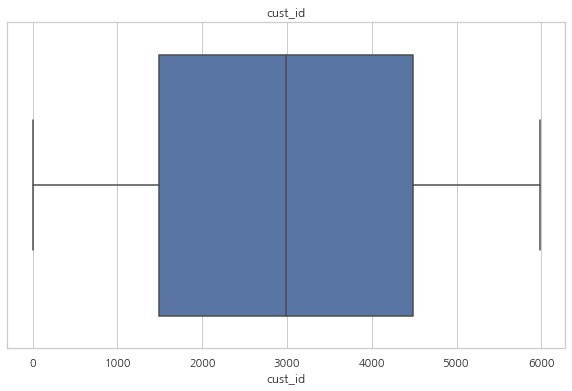

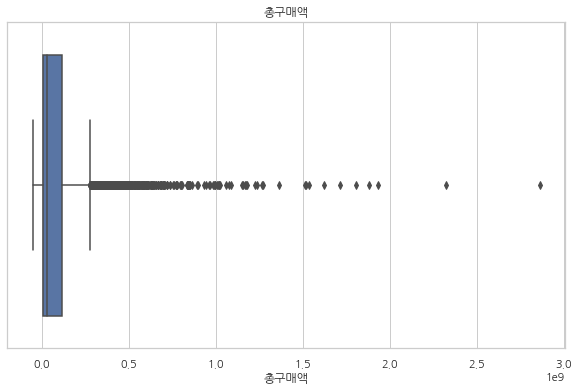

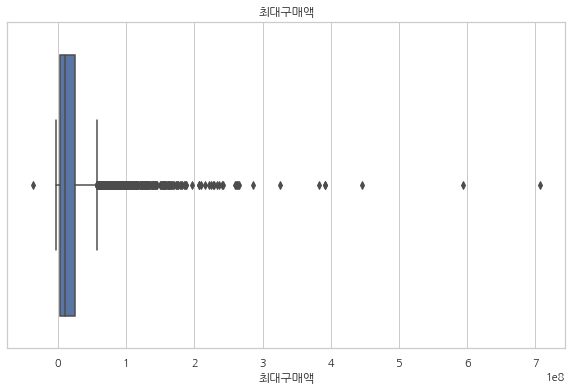

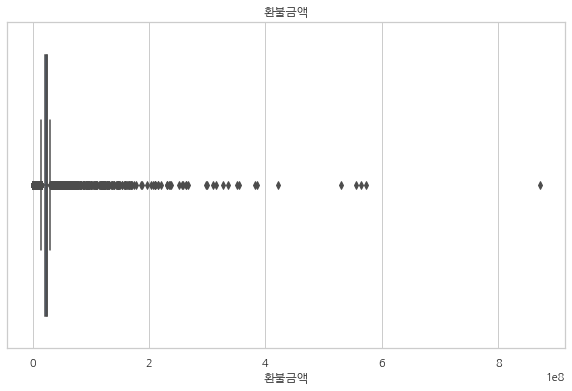

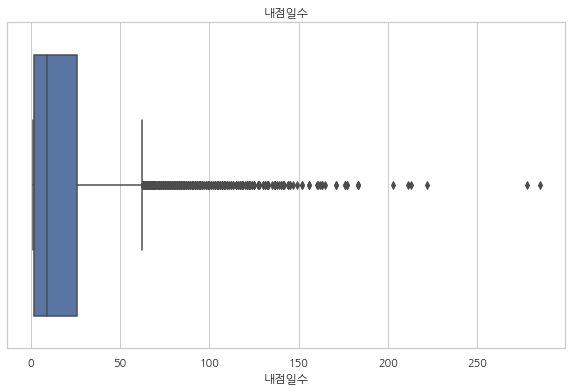

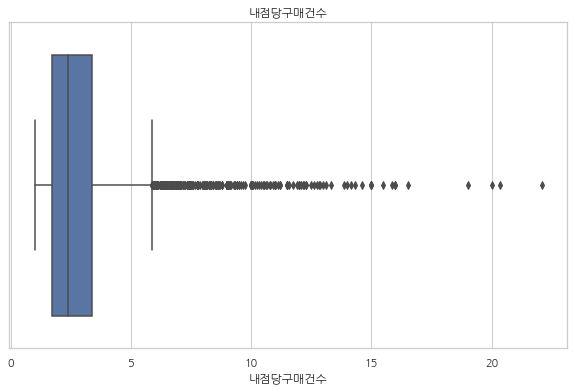

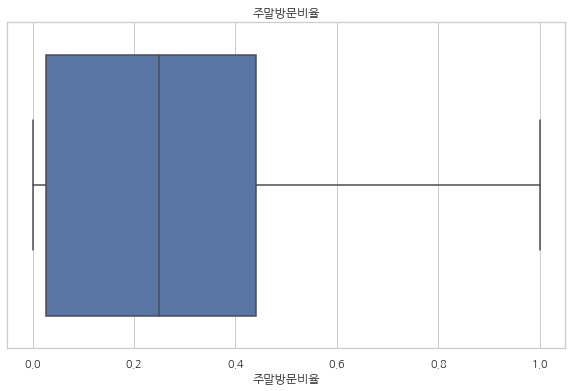

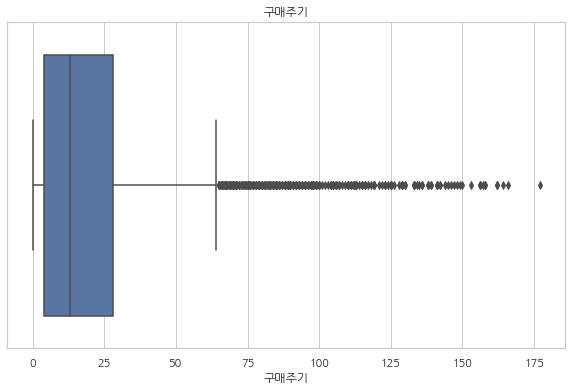

In [ ]:
for i in num:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_X, x=df_X[i])
    plt.title(i)
    plt.show

In [ ]:
cat

,주구매상품,주구매지점
0,기타,강남점
1,스포츠,잠실점
2,남성 캐주얼,관악점
3,기타,광주점
4,보석,본 점
...,...,...
2477,골프,부산본점
2478,섬유잡화,광주점
2479,남성 캐주얼,본 점
2480,육류,본 점


In [ ]:
# drop_first = True
categorical = cat.columns
df_X = pd.get_dummies(df_X, columns = categorical, prefix = categorical, drop_first = True)

In [ ]:
df_X.head()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가구,주구매상품_건강식품,주구매상품_골프,주구매상품_구두,주구매상품_기타,주구매상품_남성 캐주얼,주구매상품_남성 트랜디,주구매상품_남성정장,주구매상품_농산물,주구매상품_대형가전,주구매상품_디자이너,주구매상품_란제리/내의,주구매상품_명품,주구매상품_모피/피혁,주구매상품_보석,주구매상품_생활잡화,주구매상품_섬유잡화,주구매상품_셔츠,주구매상품_소형가전,주구매상품_수산품,주구매상품_스포츠,주구매상품_시티웨어,주구매상품_식기,주구매상품_아동,주구매상품_악기,주구매상품_액세서리,주구매상품_육류,주구매상품_일용잡화,주구매상품_젓갈/반찬,주구매상품_주류,주구매상품_주방가전,주구매상품_주방용품,주구매상품_차/커피,주구매상품_축산가공,주구매상품_침구/수예,주구매상품_캐주얼,주구매상품_커리어,주구매상품_통신/컴퓨터,주구매상품_트래디셔널,주구매상품_피혁잡화,주구매상품_화장품,주구매지점_관악점,주구매지점_광주점,주구매지점_노원점,주구매지점_대구점,주구매지점_대전점,주구매지점_동래점,주구매지점_미아점,주구매지점_본 점,주구매지점_부산본점,주구매지점_부평점,주구매지점_분당점,주구매지점_상인점,주구매지점_센텀시티점,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
0,0,68282840,11264000,6860000.00000,19,3.89474,0.52703,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2136000,2136000,300000.00000,2,1.50000,0.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,3197000,1639000,24694521.07418,2,2.00000,0.00000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,16077620,4935000,24694521.07418,18,2.44444,0.31818,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,29050000,24000000,24694521.07418,2,1.50000,0.00000,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_y_train['gender'].value_counts()

0    2184
1    1316
Name: gender, dtype: int64

In [ ]:
df_y_train.shape

(3500, 2)

In [ ]:
df_X_train2 = df_X.iloc[0:3500,:]

In [ ]:
df_X_train2.shape

(3500, 72)

In [ ]:
df_tot = pd.concat([df_X_train2, df_y_train], axis=1)

In [ ]:
df_tot.shape

(3500, 74)

In [ ]:
df_tot = df_tot.loc[:, ~df_tot.T.duplicated()]

In [ ]:
df_tot.shape

(3500, 73)

In [ ]:
feature_columns = list(df_tot.columns.difference(['gender']))
X = df_tot[feature_columns]    # 변인변수들의 데이터 Set
y = df_tot['gender']    # 종속변수 데이터를

df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)    # Test Set을 0.01의 비율로 생성

print(df_X_train.shape, df_X_test.shape, df_y_train.shape, df_y_test.shape)

(2800, 72) (700, 72) (2800,) (700,)


In [ ]:
# 연속형 변수 리스트(standard scaling 적용) 및 범주형 변수 리스트(minmax scaling 적용)

# standard_list = ['TOTAL_USED_DAYS',
#  'ANALOG_SCRB',
#  'DIGITAL_SCRB',
#  'TOTAL_INTERNET_SCRB',
#  'GIGA_INTERNET_SCRB',
#  'CH_HH_AVG_MONTH1',
#  'KIDS_USE_PV_MONTH1',
#  'KIDS_VOD_CNT_MONTH1']

## '해지여부' 컬럼 지워야 함
minmax_list = df_X_train.columns

In [ ]:
# 스케일링 적용 변수별 데이터 추출

# train_X1 = train_X[standard_list]
# test_X1 = test_X[standard_list]
train_X2 = df_X_train[minmax_list]
test_X2 = df_X_test[minmax_list]

In [ ]:
# 데이터 스케일링 진행

# scaler1 = StandardScaler()
# train_X1 = scaler1.fit_transform(train_X1)
# test_X1 = scaler1.transform(test_X1)

scaler2 = MinMaxScaler()
train_X2 = scaler2.fit_transform(train_X2)
test_X2 = scaler2.fit_transform(test_X2)

In [ ]:
# 스케일링 값으로 대체

# train_X[standard_list] = train_X1
# test_X[standard_list] = test_X1
df_X_train[minmax_list] = train_X2
df_X_test[minmax_list] = test_X2

In [ ]:
# 오버샘플링 진행
oversample = RandomOverSampler(sampling_strategy='minority') # sampling_strategy=0.4 -> 소수집단데이터수/다수집단데이터수 = 0.4
df_X_train, df_y_train = oversample.fit_resample(df_X_train, df_y_train)

In [ ]:
# 모델 정확도 확인 함수 정의

def print_score(true, pred, train = True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict = True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
# 로지스틱 회귀분석 모델 생성
lr_clf = LogisticRegression() 

# 모델 학습 진행
lr_clf.fit(df_X_train, df_y_train)

LogisticRegression()

In [ ]:
# 모델 정확도 확인
train_y_pred = lr_clf.predict(df_X_train)
test_y_pred = lr_clf.predict(df_X_test)

print_score(df_y_train, train_y_pred, train = True)
print_score(df_y_test, test_y_pred, train = False)

Train Result:
Accuracy Score: 64.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision    0.65043    0.64457   0.64744    0.64750       0.64750
recall       0.63750    0.65739   0.64744    0.64744       0.64744
f1-score     0.64390    0.65091   0.64744    0.64741       0.64741
support   1760.00000 1760.00000   0.64744 3520.00000    3520.00000
_______________________________________________
Confusion Matrix: 
 [[1122  638]
 [ 603 1157]]

Test Result:
Accuracy Score: 61.29%
_______________________________________________
CLASSIFICATION REPORT:
                  0         1  accuracy  macro avg  weighted avg
precision   0.72434   0.50696   0.61286    0.61565       0.63863
recall      0.58255   0.65942   0.61286    0.62098       0.61286
f1-score    0.64575   0.57323   0.61286    0.60949       0.61716
support   424.00000 276.00000   0.61286  700.00000     700.00000
_____________________________

In [ ]:
# [27] X_submission 으로 cust_id와 예측한 남자일 확률을 파일로 저장하기
submission = pd.DataFrame()
submission['cust_id'] = pd.RangeIndex(3500, 3500+len(df_X_test))
submission['gender'] = lr_clf.predict_proba(df_X_test)[:, 1]
submission.to_csv('/home/ljy1115/df_submission.csv', index=False)

In [ ]:
submission.head()

,cust_id,gender
0,3500,0.34697
1,3501,0.39051
2,3502,0.32615
3,3503,0.24113
4,3504,0.83464


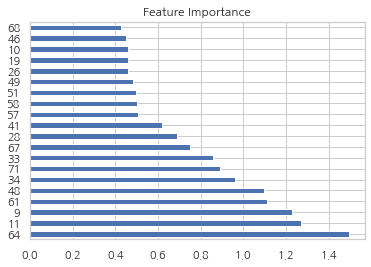

In [ ]:
importance = lr_clf.coef_[0]
#importance is a list so you can plot it.
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance');

In [ ]:
lr_clf.coef_

array([[-0.18201582, -0.06024321, -0.69327773, -2.06293467,  0.23088095,
         0.18406954,  0.23571248,  0.10993481, -0.29282793,  1.22871668,
         0.45847837,  1.27191397, -0.59866201, -0.2384727 , -1.36596225,
        -0.6871036 ,  0.06478027, -0.5007089 ,  0.05157261,  0.45862319,
        -0.00680696,  0.34307226, -0.19576127, -0.42681588,  0.34307088,
        -1.2182397 ,  0.45999883,  0.02959373,  0.68905875, -0.59458374,
        -0.26965348, -0.77646013,  0.10675522,  0.86015281,  0.95906926,
        -0.50911059, -0.11129966, -0.08235195, -1.27833371, -0.24337479,
        -0.39105603,  0.61686104,  0.19550709, -0.17726648, -0.78757777,
         0.33576646,  0.45046157,  0.09274513,  1.09491598,  0.48370006,
         0.06856194,  0.4965126 ,  0.30641264, -0.07399606, -0.09553832,
         0.27527027, -0.12831136,  0.5060833 ,  0.50104303,  0.41975218,
         0.34311992,  1.11154836,  0.07608623,  0.08558544,  1.494633  ,
        -0.39470692,  0.31348541,  0.75076558,  0.4

In [ ]:
lr_clf.intercept_

array([0.26701526])

In [ ]:
test_y_prob = lr_clf.predict_proba(df_X_test)
threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
df_thres = pd.DataFrame(index = threshold_list, columns = ['accuracy', 'recall'])

for thres in threshold_list :
  test_y_pred_prob = np.zeros(len(test_y_prob))

  for i in range(len(test_y_prob)) :
    if test_y_prob[i][1] > thres :
      test_y_pred_prob[i] = 1
  
  tn = confusion_matrix(df_y_test, test_y_pred_prob)[0][0]
  fp = confusion_matrix(df_y_test, test_y_pred_prob)[0][1]
  fn = confusion_matrix(df_y_test, test_y_pred_prob)[1][0]
  tp = confusion_matrix(df_y_test, test_y_pred_prob)[1][1]

  accuracy = (tp + tn) / (tp + fn + fp + tn)
  recall = tp / (tp + fn)

  df_thres.loc[thres, 'accuracy'] = accuracy
  df_thres.loc[thres, 'recall'] = recall

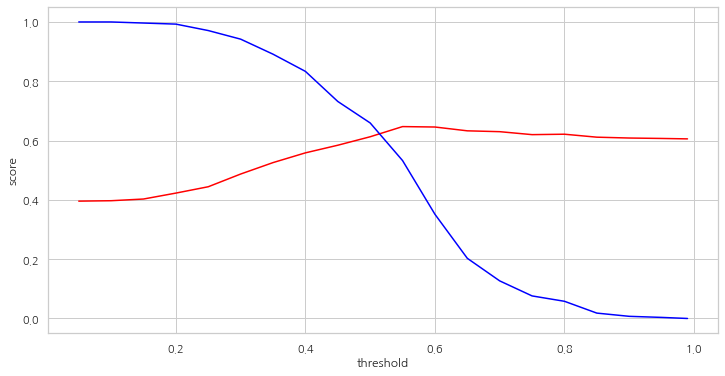

In [ ]:
# 시각화
fig, ax1 = plt.subplots(figsize = (12, 6))

plt.plot(df_thres.index, df_thres['accuracy'], color = 'red')
plt.plot(df_thres.index, df_thres['recall'], color = 'blue')

plt.xlabel('threshold')
plt.ylabel('score')
plt.grid(True)
plt.show()

### LR 모델링 및 스코어링

In [ ]:
# 모델
from sklearn.linear_model import LogisticRegression
lr_clf1 = LogisticRegression()
lr_clf1.fit(df_X_train, df_y_train)
coef = lr_clf1.coef_.reshape(-1)
lr_pred = lr_clf1.predict(df_X_test)
lr_pred_proba = lr_clf1.predict_proba(df_X_test)[:,1]

In [ ]:
from sklearn.metrics import *
print(classification_report(df_y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.72      0.58      0.65       424
           1       0.51      0.66      0.57       276

    accuracy                           0.61       700
   macro avg       0.62      0.62      0.61       700
weighted avg       0.64      0.61      0.62       700



In [ ]:
lr_pred_proba

array([0.34697269, 0.39051196, 0.32614652, 0.24113479, 0.83464481,
       0.59097991, 0.36786159, 0.33599531, 0.26637776, 0.57040814,
       0.41989145, 0.67802539, 0.69072783, 0.1981049 , 0.65655528,
       0.48096389, 0.24541117, 0.40148025, 0.29281399, 0.63639515,
       0.39497339, 0.44152067, 0.48829905, 0.14469972, 0.55330794,
       0.6478308 , 0.32412957, 0.48323466, 0.65918744, 0.26709356,
       0.21935785, 0.39412187, 0.44327212, 0.58661023, 0.59308606,
       0.2460254 , 0.57063398, 0.7141831 , 0.21711147, 0.70197005,
       0.63702269, 0.46992726, 0.63244109, 0.59296845, 0.53640809,
       0.50908755, 0.70555473, 0.417912  , 0.31660595, 0.60369917,
       0.45533878, 0.23574788, 0.34272196, 0.69008964, 0.62521384,
       0.27349016, 0.63138948, 0.35791056, 0.49872984, 0.63327977,
       0.61195939, 0.41424146, 0.28833232, 0.35379957, 0.53502414,
       0.33833909, 0.52245318, 0.47791058, 0.35280189, 0.68577799,
       0.60929148, 0.28087046, 0.60686241, 0.54515351, 0.57429

In [ ]:
y_test2 = df_y_test.reset_index(drop = True)
cross = pd.concat([y_test2, pd.DataFrame(lr_pred)],axis =1)
cross.columns = ['true','pred']

In [ ]:
cross['cm'] = np.where((cross['true']== 1) & (cross['pred']==1), 'TP', np.where((cross['true']== 1) & (cross['pred']==0),'FN', np.where((cross['true']== 0) & (cross['pred']==1), 'FP',np.where((cross['true']== 0) & (cross['pred']==0), 'TN',0))))
conf_mat = dict(cross['cm'].value_counts())

In [ ]:
conf_mat

{'TN': 247, 'TP': 182, 'FP': 177, 'FN': 94}

In [ ]:
accuracy = ( conf_mat['TN'] + conf_mat['TP'] ) / ( conf_mat['TN']+conf_mat['TP'] + conf_mat['FN']+conf_mat['FP'] )
precision = conf_mat['TP'] / (conf_mat['TP'] + conf_mat['FP'])
recall = conf_mat['TP'] / (conf_mat['TP'] + conf_mat['FN'])
f1_score = 2*recall*precision / (recall+precision)

print('accuracy : ', accuracy)
print('precision : ', precision)
print('recall : ', recall)
print('f1_score : ', f1_score)

accuracy :  0.6128571428571429
precision :  0.5069637883008357
recall :  0.6594202898550725
f1_score :  0.5732283464566928


/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


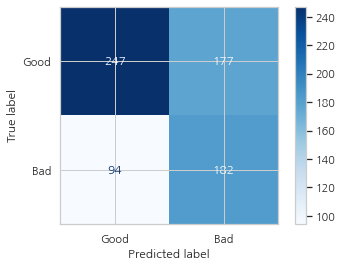

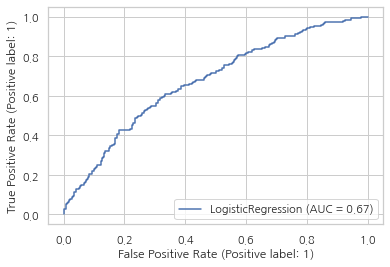

In [ ]:
# confusion matrix, AUC-ROC 커브 생성
# AUC 0.8이상이면 good

disp = plot_confusion_matrix(lr_clf, df_X_test, df_y_test, cmap='Blues', values_format='d', display_labels=['Good', 'Bad'])
disp = plot_roc_curve(lr_clf, df_X_test, df_y_test)

In [ ]:
# Train Set 및 Test Set 추출
selected = df_X_train.columns

df_X_train2 = df_X_train[selected]
df_X_test2 = df_X_test[selected]

In [ ]:
# Random Forest 모델 생성
# rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 8, max_features = 'auto', min_samples_split = 6, random_state = 123)    # n_estimators는 생성할 Tree의 개수. 개수가 많을수록 정확도가 올라가지만 모델 학습 시간이 길어짐
rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 8, max_features = 'auto', min_samples_split = 6, random_state = 123)    # n_estimators는 생성할 Tree의 개수. 개수가 많을수록 정확도가 올라가지만 모델 학습 시간이 길어짐

# 모델 학습 진행
rf_clf.fit(df_X_train2, df_y_train)

# 모델 정확도 확인
train_y_pred = rf_clf.predict(df_X_train2)
test_y_pred = rf_clf.predict(df_X_test2)

print_score(df_y_train, train_y_pred, train = True)
print_score(df_y_test, test_y_pred, train = False)

/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Result:
Accuracy Score: 72.67%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision    0.74419    0.71156   0.72670    0.72787       0.72787
recall       0.69091    0.76250   0.72670    0.72670       0.72670
f1-score     0.71656    0.73615   0.72670    0.72635       0.72635
support   1760.00000 1760.00000   0.72670 3520.00000    3520.00000
_______________________________________________
Confusion Matrix: 
 [[1216  544]
 [ 418 1342]]

Test Result:
Accuracy Score: 62.57%
_______________________________________________
CLASSIFICATION REPORT:
                  0         1  accuracy  macro avg  weighted avg
precision   0.68409   0.52692   0.62571    0.60551       0.62212
recall      0.70991   0.49638   0.62571    0.60314       0.62571
f1-score    0.69676   0.51119   0.62571    0.60398       0.62359
support   424.00000 276.00000   0.62571  700.00000     700.00000
_____________________________

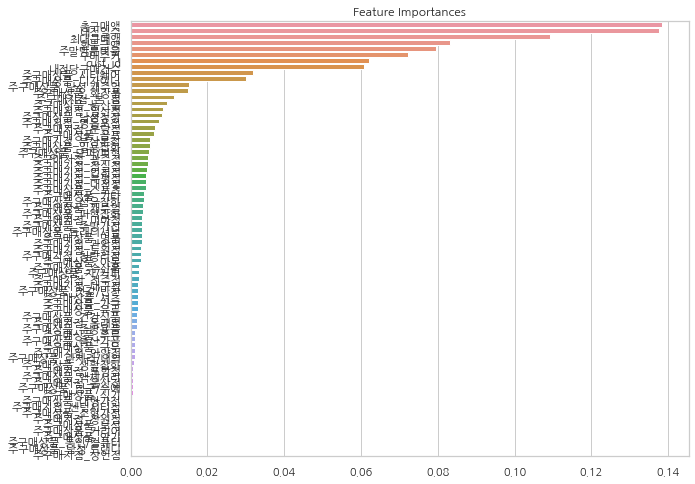

In [ ]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = df_X_test.columns)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
sns.barplot(x = ftr_importances, y = ftr_importances.index);

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
# 모델
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(df_X_train, df_y_train)
# coef = rf.coef_.reshape(-1)
lr_pred = rf.predict(df_X_test)
lr_pred_proba = rf.predict_proba(df_X_test)[:,1]

In [ ]:
from sklearn.metrics import *
print(classification_report(df_y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74       424
           1       0.58      0.29      0.39       276

    accuracy                           0.64       700
   macro avg       0.61      0.58      0.56       700
weighted avg       0.62      0.64      0.60       700



In [ ]:
y_test2 = df_y_test.reset_index(drop = True)
cross = pd.concat([y_test2, pd.DataFrame(lr_pred)],axis =1)
cross.columns = ['true','pred']

In [ ]:
cross['cm'] = np.where((cross['true']== 1) & (cross['pred']==1), 'TP', np.where((cross['true']== 1) & (cross['pred']==0),'FN', np.where((cross['true']== 0) & (cross['pred']==1), 'FP',np.where((cross['true']== 0) & (cross['pred']==0), 'TN',0))))
conf_mat = dict(cross['cm'].value_counts())

In [ ]:
conf_mat

{'TN': 365, 'FN': 196, 'TP': 80, 'FP': 59}

In [ ]:
accuracy = ( conf_mat['TN'] + conf_mat['TP'] ) / ( conf_mat['TN']+conf_mat['TP'] + conf_mat['FN']+conf_mat['FP'] )
precision = conf_mat['TP'] / (conf_mat['TP'] + conf_mat['FP'])
recall = conf_mat['TP'] / (conf_mat['TP'] + conf_mat['FN'])
f1_score = 2*recall*precision / (recall+precision)

print('accuracy : ', accuracy)
print('precision : ', precision)
print('recall : ', recall)
print('f1_score : ', f1_score)

accuracy :  0.6357142857142857
precision :  0.5755395683453237
recall :  0.2898550724637681
f1_score :  0.3855421686746988


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# 모델
from sklearn.ensemble import GradientBoostingClassifier
rf = GradientBoostingClassifier()
rf.fit(df_X_train, df_y_train)
# coef = rf.coef_.reshape(-1)
lr_pred = rf.predict(df_X_test)
lr_pred_proba = rf.predict_proba(df_X_test)[:,1]

In [ ]:
from sklearn.metrics import *
print(classification_report(df_y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       424
           1       0.54      0.36      0.43       276

    accuracy                           0.63       700
   macro avg       0.60      0.58      0.58       700
weighted avg       0.61      0.63      0.61       700



In [ ]:
y_test2 = df_y_test.reset_index(drop = True)
cross = pd.concat([y_test2, pd.DataFrame(lr_pred)],axis =1)
cross.columns = ['true','pred']

In [ ]:
cross['cm'] = np.where((cross['true']== 1) & (cross['pred']==1), 'TP', np.where((cross['true']== 1) & (cross['pred']==0),'FN', np.where((cross['true']== 0) & (cross['pred']==1), 'FP',np.where((cross['true']== 0) & (cross['pred']==0), 'TN',0))))
conf_mat = dict(cross['cm'].value_counts())

In [ ]:
conf_mat

{'TN': 338, 'FN': 176, 'TP': 100, 'FP': 86}

In [ ]:
accuracy = ( conf_mat['TN'] + conf_mat['TP'] ) / ( conf_mat['TN']+conf_mat['TP'] + conf_mat['FN']+conf_mat['FP'] )
precision = conf_mat['TP'] / (conf_mat['TP'] + conf_mat['FP'])
recall = conf_mat['TP'] / (conf_mat['TP'] + conf_mat['FN'])
f1_score = 2*recall*precision / (recall+precision)

print('accuracy : ', accuracy)
print('precision : ', precision)
print('recall : ', recall)
print('f1_score : ', f1_score)

accuracy :  0.6257142857142857
precision :  0.5376344086021505
recall :  0.36231884057971014
f1_score :  0.43290043290043284


In [ ]:
xgb = XGBClassifier(random_state = 2357)
xgb.fit(df_X_train, df_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=2357, reg_alpha=0, reg_lambda=1, ...)

In [ ]:
#train 데이터 설명력
print("Score on training set: {:.3f}".format(xgb.score(df_X_train, df_y_train)))
#test데이터 설명력
print("Score on test set: {:.3f}".format(xgb.score(df_X_test, df_y_test)))

Score on training set: 0.965
Score on test set: 0.636


In [ ]:
y_train_pred = xgb.predict(df_X_train)

print('Confusion Matrix : \n {}'.format(confusion_matrix(df_y_train, y_train_pred)))
print('\n Classification Report : \n {}' .format(classification_report(df_y_train,y_train_pred)))

Confusion Matrix : 
 [[1683   77]
 [  45 1715]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1760
           1       0.96      0.97      0.97      1760

    accuracy                           0.97      3520
   macro avg       0.97      0.97      0.97      3520
weighted avg       0.97      0.97      0.97      3520



In [ ]:
y_test_pred = xgb.predict(df_X_test)

print('Confusion Matrix : \n {}'.format(confusion_matrix(df_y_test, y_test_pred)))
print('\n Classification Report : \n {}' .format(classification_report(df_y_test,y_test_pred)))

Confusion Matrix : 
 [[286 138]
 [117 159]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.67      0.69       424
           1       0.54      0.58      0.55       276

    accuracy                           0.64       700
   macro avg       0.62      0.63      0.62       700
weighted avg       0.64      0.64      0.64       700



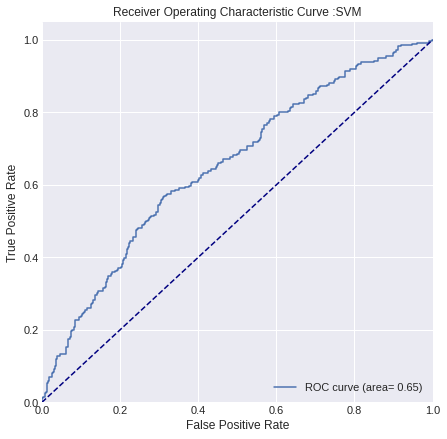

In [ ]:
# tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

y_test_prob = xgb.predict_proba(df_X_test)[:, 1]

# roc_curve
fpr, tpr, thresholds = roc_curve(df_y_test, y_test_prob)
roc_auc_logit = auc(fpr,tpr)
plt.figure(figsize=(7,7))
plt.style.use('seaborn-darkgrid')

plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' % roc_auc_logit)

##그래프에 직선 추가하기
plt.style.use('seaborn-darkgrid')

plt.plot([0,1],[0,1],color='navy', linestyle='--')

#x축과 y축 구간 설정하기
plt.xlim([0,1])
plt.ylim([0,1.05])

#축 이름 및 그래프 타이틀, 레전드 추가하기
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve :SVM')
plt.legend(loc="lower right")

plt.show()

Text(0, 0.5, '변수')

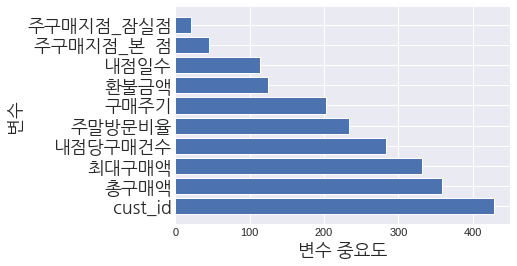

In [ ]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.sort_values('score', ascending=False, inplace=True)
data = data.head(10)
coordinates=range(len(data))
plt.barh(y=coordinates, width=data['score'])
plt.yticks(coordinates, data.index, fontproperties = fontprop)
plt.xlabel('변수 중요도', fontproperties = fontprop)
plt.ylabel('변수', fontproperties = fontprop)

In [ ]:
# 보험가입여부 예측

In [ ]:
df = pd.read_csv("/home/ljy1115/project/travel_insurance_train03.csv")

In [ ]:
# df = pd.concat([train, test], axis = 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
# 숫자변수 확인
num = df.select_dtypes(include='number')
# 범주변수 확인
cat = df.select_dtypes(exclude='number')

In [ ]:
# drop_first = True
categorical = cat.columns
df = pd.get_dummies(df, columns = categorical, prefix = categorical, drop_first = True)

In [ ]:
df.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,26,1400000,3,1,0,1,1,0,1
1,28,1100000,4,1,1,1,1,0,0
2,33,1400000,4,0,1,1,1,0,1
3,28,800000,3,1,0,1,1,0,0
4,33,1000000,5,0,1,0,1,0,1


In [ ]:
df.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance', 'Employment Type_Private Sector/Self Employed',
       'GraduateOrNot_Yes', 'FrequentFlyer_Yes', 'EverTravelledAbroad_Yes'],
      dtype='object')

In [ ]:
# train / test split
feature_columns = list(df.columns.difference(['TravelInsurance']))
X = df[feature_columns]    # 변인변수들의 데이터 Set
y = df['TravelInsurance']    # 종속변수 데이터를

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 55)    # Test Set을 0.2의 비율로 생성

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(1192, 8) (298, 8) (1192,) (298,)


In [ ]:
minmax_list = df.columns.tolist()
minmax_list.remove('TravelInsurance')
minmax_list

['Age',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'Employment Type_Private Sector/Self Employed',
 'GraduateOrNot_Yes',
 'FrequentFlyer_Yes',
 'EverTravelledAbroad_Yes']

In [ ]:
# 스케일링 적용 변수별 데이터 추출

# train_X1 = train_X[standard_list]
# test_X1 = test_X[standard_list]
train_X2 = train_X[minmax_list]
test_X2 = test_X[minmax_list]

In [ ]:
# 데이터 스케일링 진행

# scaler1 = StandardScaler()
# train_X1 = scaler1.fit_transform(train_X1)
# test_X1 = scaler1.transform(test_X1)

scaler2 = MinMaxScaler()
train_X2 = scaler2.fit_transform(train_X2)
test_X2 = scaler2.fit_transform(test_X2)

In [ ]:
# 스케일링 값으로 대체

# train_X[standard_list] = train_X1
# test_X[standard_list] = test_X1
train_X[minmax_list] = train_X2
test_X[minmax_list] = test_X2

In [ ]:
# 모델
from sklearn.linear_model import LogisticRegression
lr_clf2 = LogisticRegression()
lr_clf2.fit(train_X, train_y)
coef = lr_clf2.coef_.reshape(-1) # coef 구함
lr_pred = lr_clf2.predict(test_X)
lr_pred_proba = lr_clf2.predict_proba(test_X)[:,1]

In [ ]:
from sklearn.metrics import *
print(classification_report(test_y, lr_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       183
           1       0.75      0.50      0.60       115

    accuracy                           0.74       298
   macro avg       0.74      0.70      0.70       298
weighted avg       0.74      0.74      0.73       298



### LR 변수 중요도

In [ ]:
#feature_weights
df_features = pd.DataFrame(columns=['col','weight'])
for idx, w in sorted(enumerate(coef), key=lambda x:-x[1])[:100]:
    df_features = df_features.append(pd.DataFrame([[train_X.columns[idx],w]],columns=['col','weight']),ignore_index=True)
df_features=df_features.sort_values(by=['weight'],ascending=False).reset_index(drop=True)
df_features['log_value'] = np.exp(df_features.weight)

<AxesSubplot:xlabel='weight', ylabel='col'>

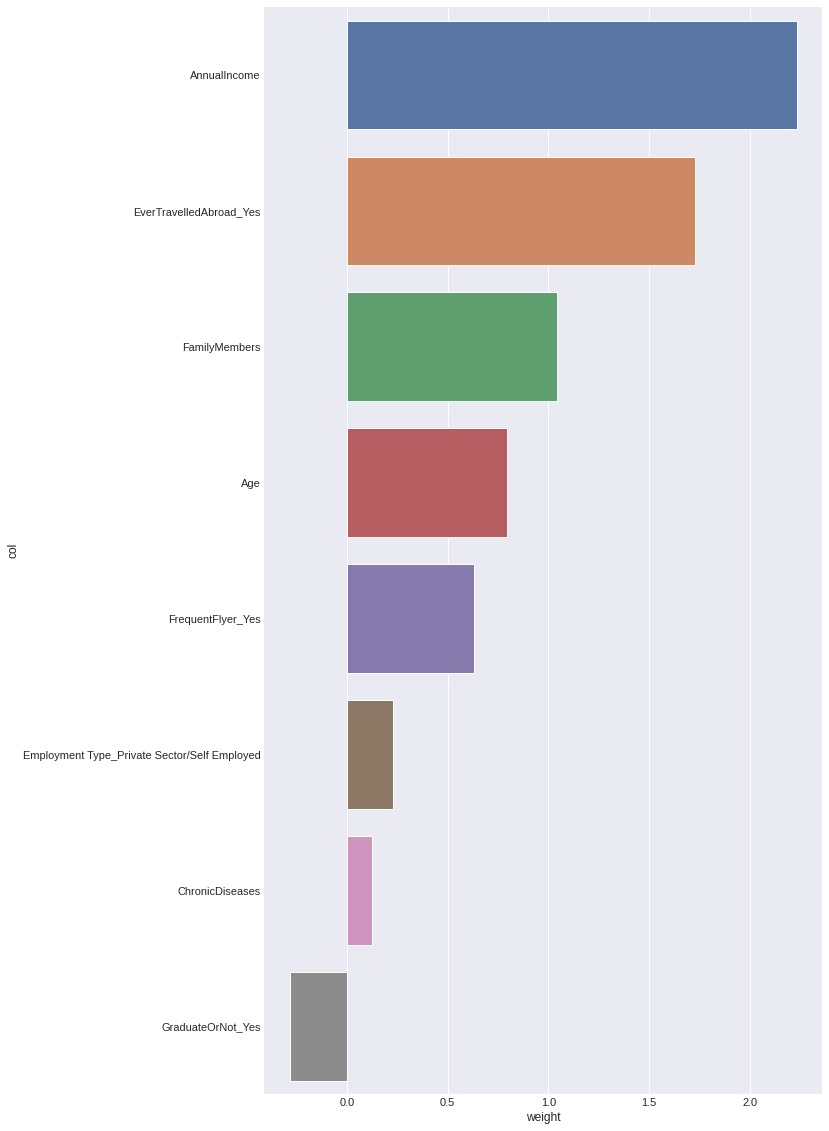

In [ ]:
#plot
plt.figure(figsize=(10,20))
sns.barplot(data=df_features,x='weight',y='col')
# plt.show()